In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_billiard(x_traj, y_traj, x_rev_traj, y_rev_traj):
    plt.plot(x_traj, y_traj, '-b', label='Forward', linewidth=2)
    plt.plot(x_rev_traj, y_rev_traj, '-r', label='Reversed', linewidth=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Billiard Motion')
    plt.legend(loc='best')
    plt.axis('equal')
    plt.grid(True)
    plt.show()

In [ ]:
def next_position(x, y, px, py):
    # calculate the next position of the particle
    t = (-x*px - y*py + np.sqrt((x*px + y*py)**2 - (px**2 + py**2)*(x**2 + y**2 - 1))) / (px**2 + py**2)
    x_new = x + t * px
    y_new = y + t * py
    return x_new, y_new

In [ ]:
def next_momentum(x, y, px, py):
    # calculate the new momentum of the particle after reflection
    px_new = (y**2 - x**2) * px - 2 * x * y * py
    py_new = -2 * x * y * px + (x**2 - y**2) * py
    return px_new, py_new

In [ ]:
def simulate_billiard(n, delta):
    # simulate the billiard motion for n reflections
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)
    px, py = np.random.normal(size=2)
    p0_norm = np.sqrt(px**2 + py**2)
    px /= p0_norm
    py /= p0_norm
    x_traj = [x]
    y_traj = [y]
    px_traj = [px]
    py_traj = [py]
    for i in range(n):
        x_new, y_new = next_position(x, y, px, py)
        px_new, py_new = next_momentum(x_new, y_new, px, py)
        x_traj.append(x_new)
        y_traj.append(y_new)
        px_traj.append(px_new)
        py_traj.append(py_new)
        x, y, px, py = x_new, y_new, px_new, py_new
    # reverse the momentum and check if the path is the same
    x_rev_traj = [x_traj[0]]
    y_rev_traj = [y_traj[0]]
    px_rev_traj = [-px_traj[0]]
    py_rev_traj = [-py_traj[0]]
    for i in range(1, n+1):
        x_rev, y_rev = next_position(x_rev_traj[-1], y_rev_traj[-1], px_rev_traj[-1], py_rev_traj[-1])
        px_rev, py_rev = next_momentum(x_rev, y_rev, px_rev_traj[-1], py_rev_traj[-1])
        x_rev_traj.append(x_rev)
        y_rev_traj.append(y_rev)
        px_rev_traj.append(px_rev)
        py_rev_traj.append(py_rev)

    plot_billiard(x_traj, y_traj, x_rev_traj, y_rev_traj)
    return n

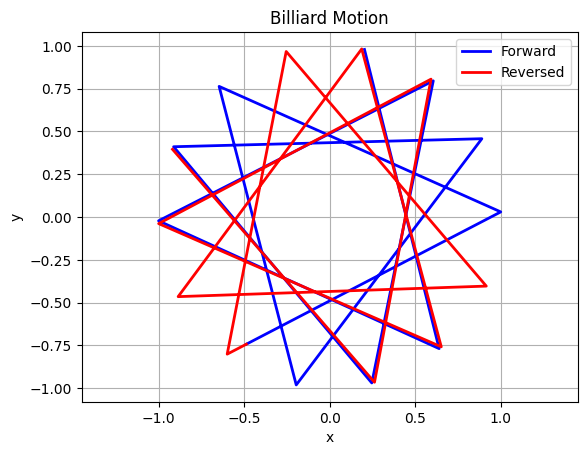

10

In [ ]:
simulate_billiard(10, 1e-6)

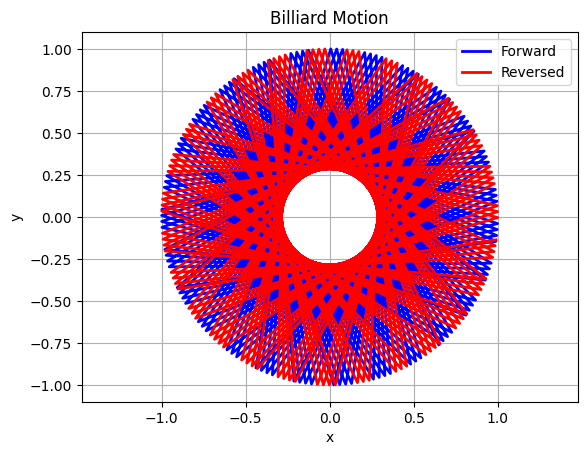

100

In [ ]:
simulate_billiard(100, 1e-5)

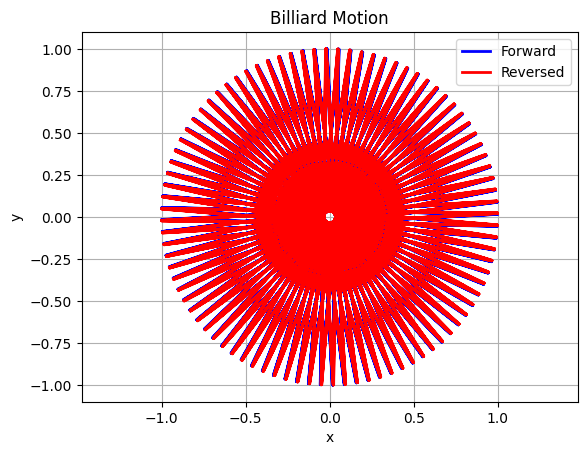

500

In [ ]:
simulate_billiard(500, 1e-3)